In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
backup = data.copy()

In [3]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


<Axes: >

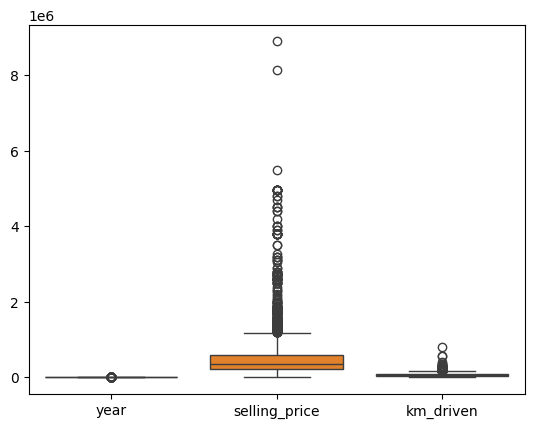

In [6]:
sns.boxplot(data)

In [7]:
data = data[data['selling_price'] <= 8100000]

<Axes: >

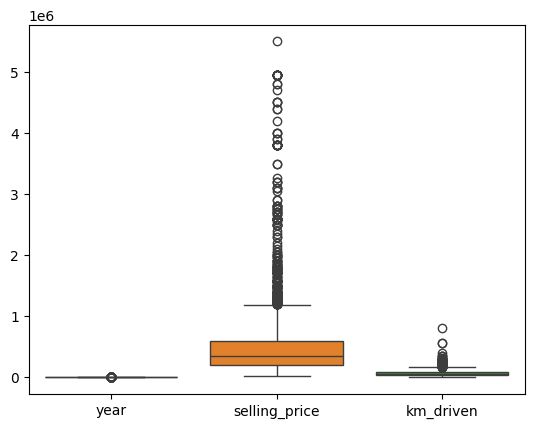

In [8]:
sns.boxplot(data)

In [9]:
data['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [10]:
data['owner'] = data['owner'].map({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5})

In [11]:
data['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [12]:
data['transmission'] = data['transmission'].map({'Manual': 1, 'Automatic': 2})

In [13]:
data['transmission'].value_counts()

transmission
1    3892
2     446
Name: count, dtype: int64

In [14]:
data['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [15]:
data['seller_type'] = data['seller_type'].map({'Individual': 1, 'Dealer': 2, 'Trustmark Dealer': 3})

In [16]:
data['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [17]:
data['fuel'].value_counts()

fuel
Diesel      2152
Petrol      2122
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

In [18]:
data = data[data['fuel'] != 'Electric']
data = data[data['fuel'] != 'LPG']

In [19]:
data['fuel'] = data['fuel'].map({'Diesel': 1, 'Petrol': 2, 'CNG': 3})

In [21]:
data['age'] = 2023 - data['year']

In [49]:
def extract_brand_model(name):
    parts = name.split(maxsplit=1)
    brand = parts[0]
    model = parts[1] if len(parts) > 1 else ''
    return brand, model

In [50]:
data['brand'], data['model'] = zip(*data['name'].apply(extract_brand_model))

In [56]:
data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age,brand,model
0,2007,60000,70000,2,1,1,1,16,Maruti,800 AC
1,2007,135000,50000,2,1,1,1,16,Maruti,Wagon R LXI Minor
2,2012,600000,100000,1,1,1,1,11,Hyundai,Verna 1.6 SX
3,2017,250000,46000,2,1,1,1,6,Datsun,RediGO T Option
4,2014,450000,141000,1,1,1,2,9,Honda,Amaze VX i-DTEC
...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,1,1,1,2,9,Hyundai,i20 Magna 1.4 CRDi (Diesel)
4336,2014,409999,80000,1,1,1,2,9,Hyundai,i20 Magna 1.4 CRDi
4337,2009,110000,83000,2,1,1,2,14,Maruti,800 AC BSIII
4338,2016,865000,90000,1,1,1,1,7,Hyundai,Creta 1.6 CRDi SX Option


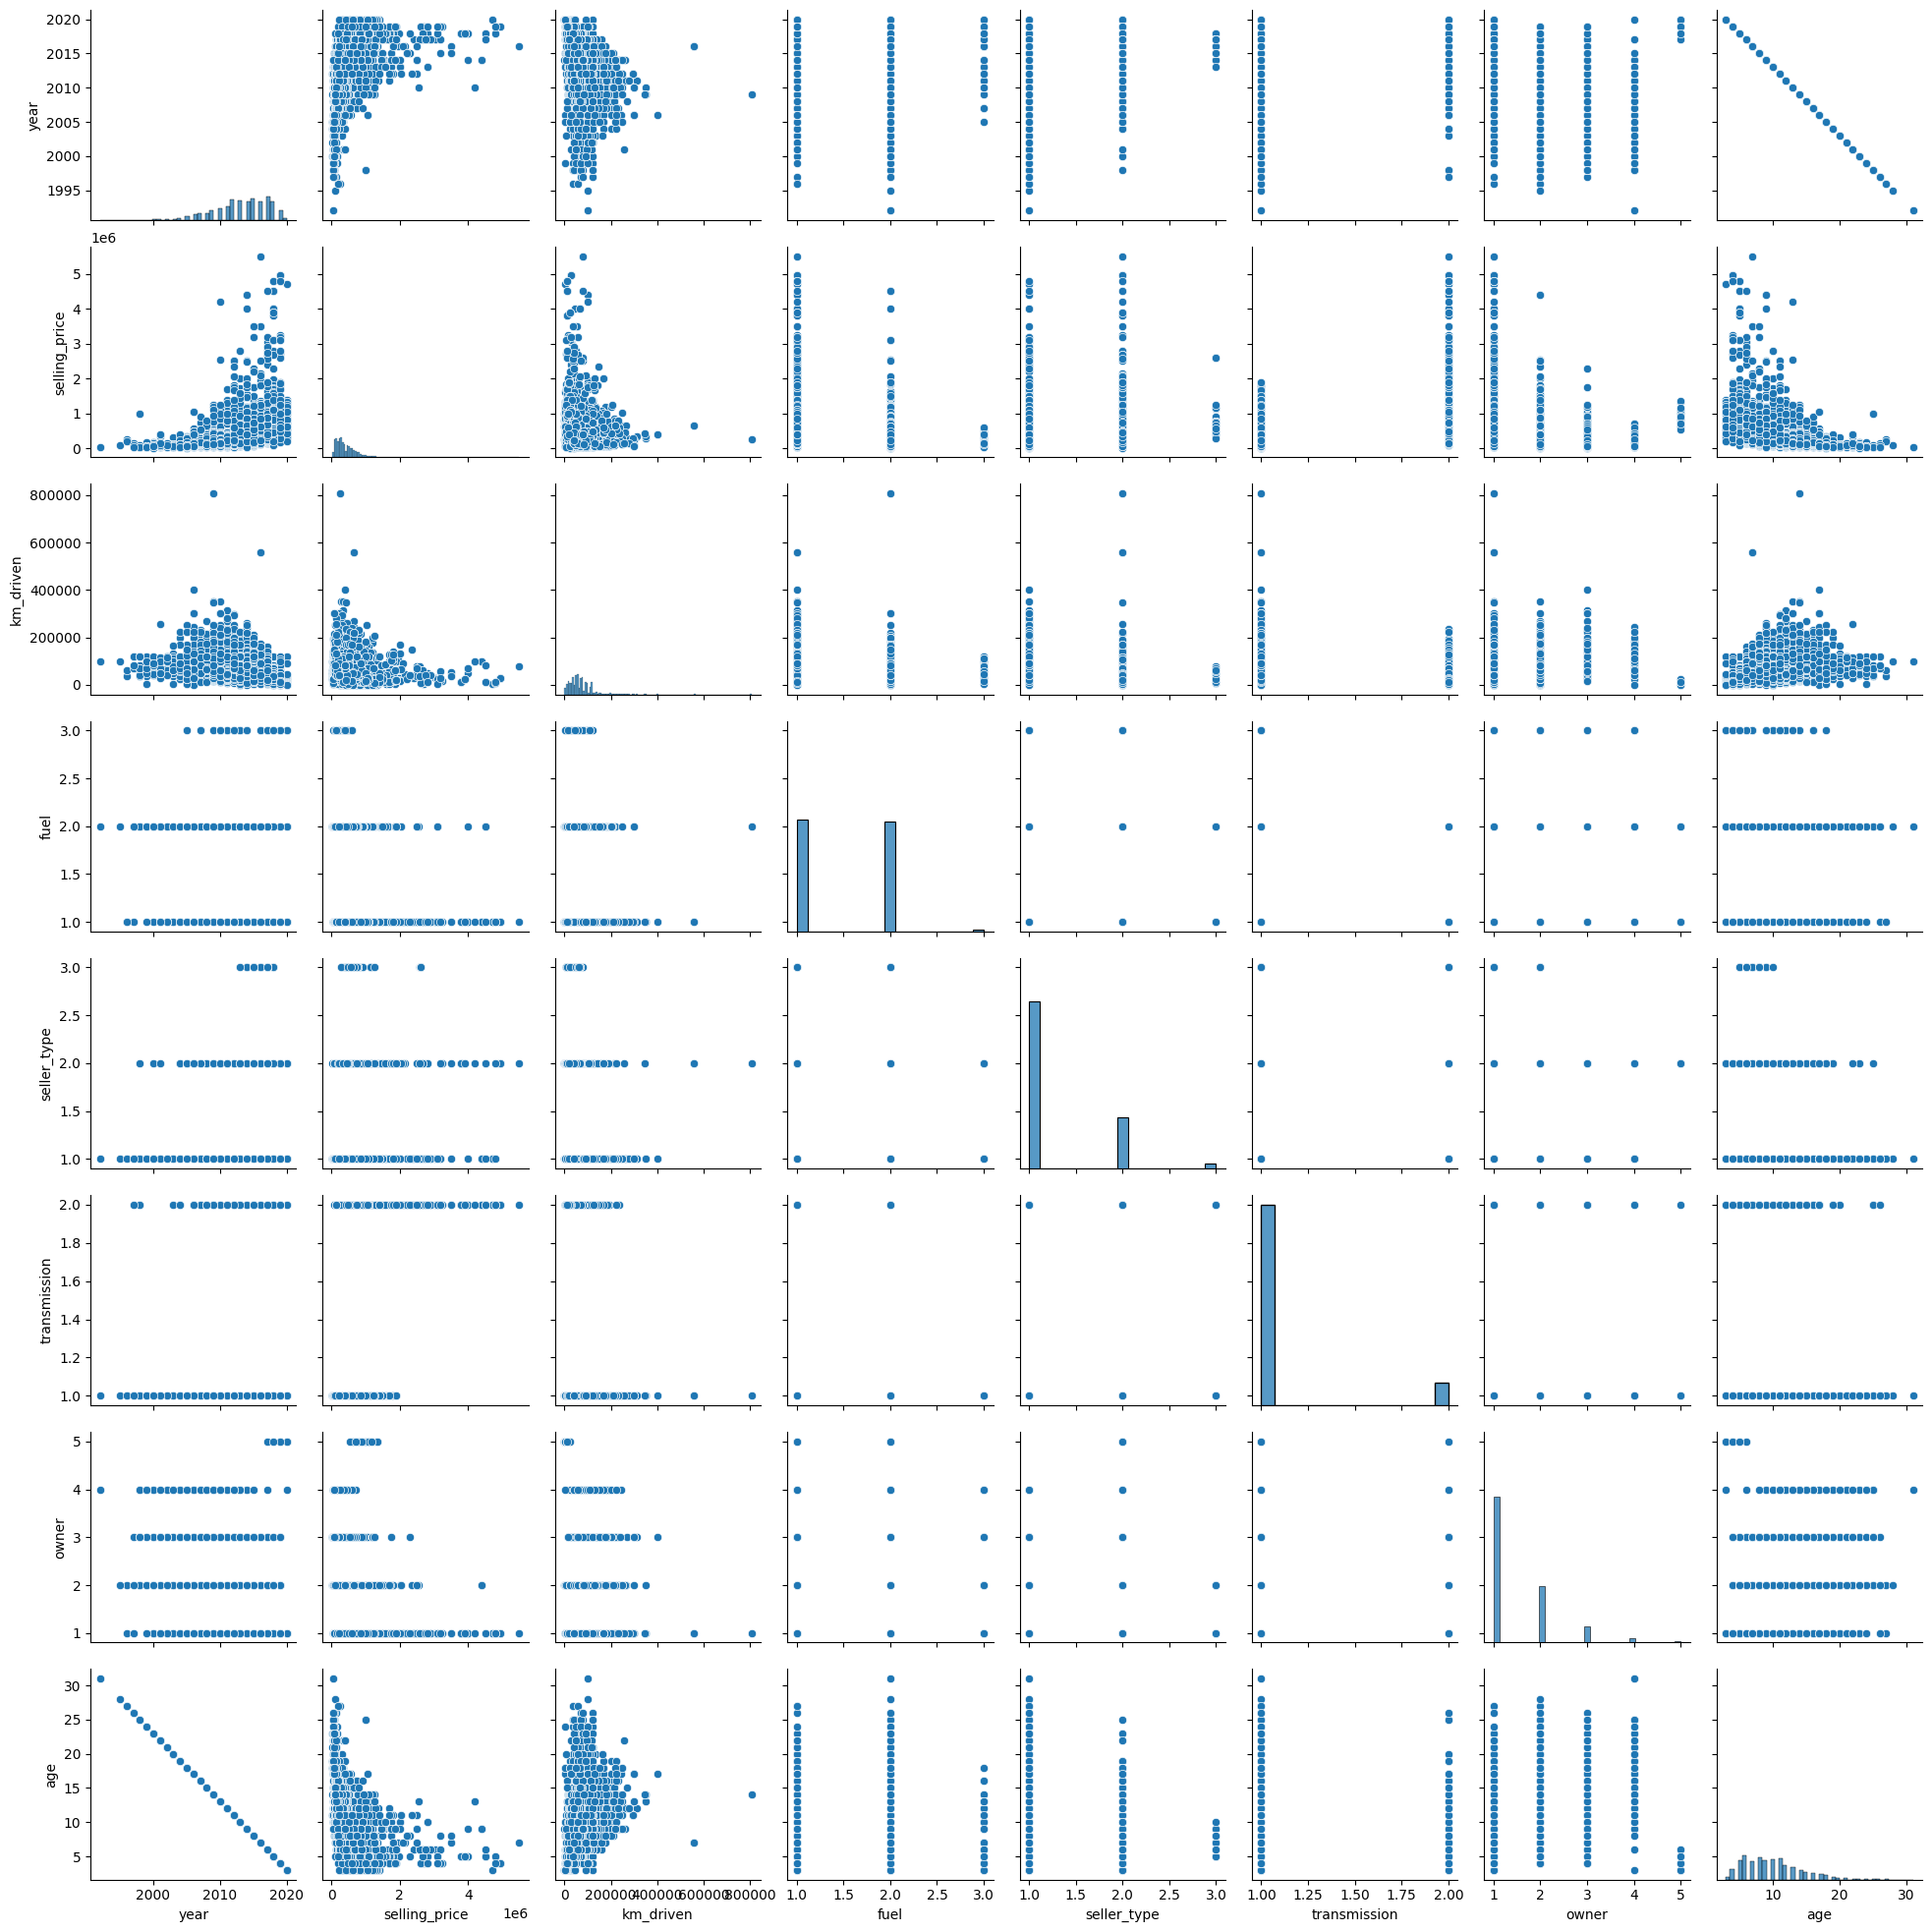

In [60]:
sns.pairplot(data)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [63]:
X = data[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'age']]
y = data['selling_price']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [65]:
lm = LinearRegression()

In [66]:
lm.fit(X_train, y_train)

LinearRegression()

In [67]:
lm.coef_

array([ 1.91931711e+04, -9.39365892e-01, -2.55313852e+05,  7.19565286e+04,
        8.33669324e+05, -1.30278942e+04, -1.91931711e+04])

In [69]:
y_pred = lm.predict(X_test)

In [75]:
print('MAE :',metrics.mean_absolute_error(y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 Score: ',metrics.r2_score(y_test, y_pred))

MAE : 234333.89604181517
RMSE : 424960.49136288516
r2 Score:  0.4578582013601994


<Axes: xlabel='selling_price', ylabel='Count'>

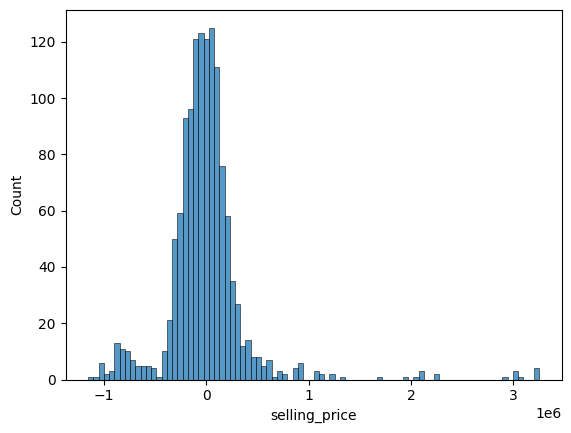

In [76]:
sns.histplot((y_test-y_pred))